In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Replace 'data.csv' with your actual data file path
data = pd.read_csv('/content/cleaned_healthcare-dataset-stroke-data.csv')

# Feature selection and preprocessing
x = data[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']] # Select relevant features
y = data['stroke'] # Target variable for stroke prediction

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(feature_x, y, test_size=0.2, random_state=42)

# Feature scaling (if necessary)
# ...


In [ ]:
# Define and instantiate model
lr_model = LogisticRegression(solver='lbfgs', random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.8530


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Model Coefficients:\n{lr_model.coef_}")

Model Coefficients:
[[0.06874861 0.33065842 0.32043266 0.00375237 0.00265999]]


hypertension: 0.3306584218866933
heart_disease: 0.32043265622633293
age: 0.06874861182917226
avg_glucose_level: 0.003752366257926844
bmi: 0.002659992470229381


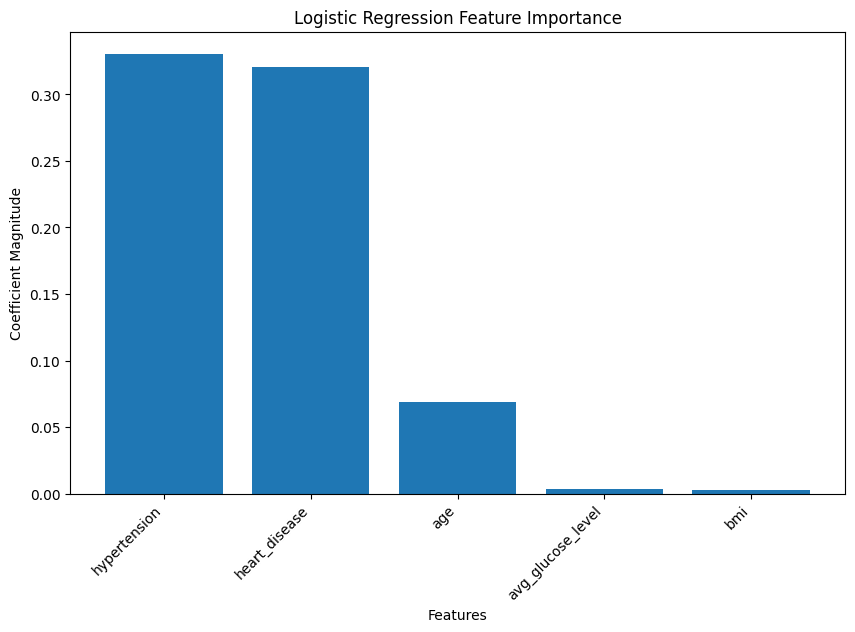

In [ ]:
# Assuming you have your trained logistic regression model: lr_model
# Assuming you have your feature names: feature_names
feature_names = data[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
# Get the coefficients and feature names
coefficients = lr_model.coef_[0]
feature_importance = list(zip(feature_names, coefficients))

# Sort the feature importance based on absolute values of coefficients
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Print or visualize the feature importance
for feature, coef in feature_importance:
    print(f"{feature}: {coef}")

# Plotting a bar chart for visualization
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in feature_importance], [x[1] for x in feature_importance])
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Logistic Regression Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Define and Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#Make predictions and evaluate performance
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")



Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.8562


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Analyzing the Future Importance
feature_importance = rf_model.feature_importances_
print(f"Feature importance: {feature_importance}")


Feature importance: [0.43215468 0.04144333 0.0508423  0.27302883 0.20253087]


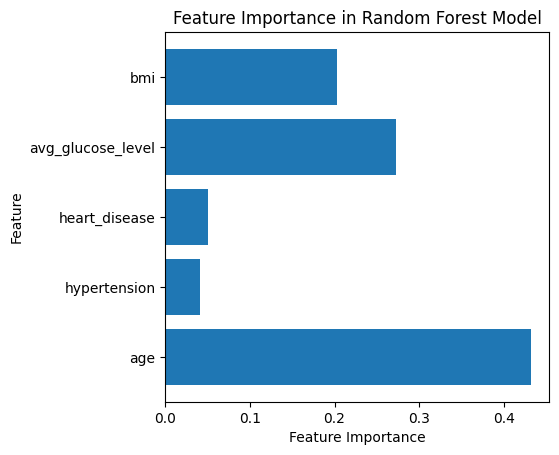

In [ ]:
# Create a bar chart
import matplotlib.pyplot as plt
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.subplots_adjust(left=0.3)
plt.show()

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, roc_auc, conf_matrix

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc, rf_conf_matrix = evaluate_model(rf_model, X_test, y_test)

# Evaluate Logistic Regression
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc, lr_conf_matrix = evaluate_model(lr_model, X_test, y_test)

# Print the results
print("Random Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_roc_auc:.4f}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_roc_auc:.4f}")
print(f"Confusion Matrix:\n{lr_conf_matrix}")

Random Forest Model Evaluation:
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Confusion Matrix:
[[960   0]
 [ 62   0]]

Logistic Regression Model Evaluation:
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Confusion Matrix:
[[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve, auc

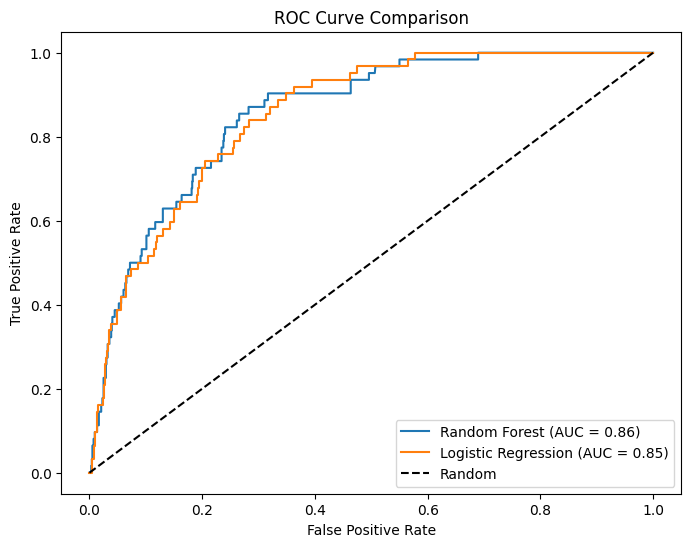

In [ ]:
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))

# Plot Random Forest ROC Curve
plot_roc_curve(rf_model, X_test, y_test, 'Random Forest')

# Plot Logistic Regression ROC Curve
plot_roc_curve(lr_model, X_test, y_test, 'Logistic Regression')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

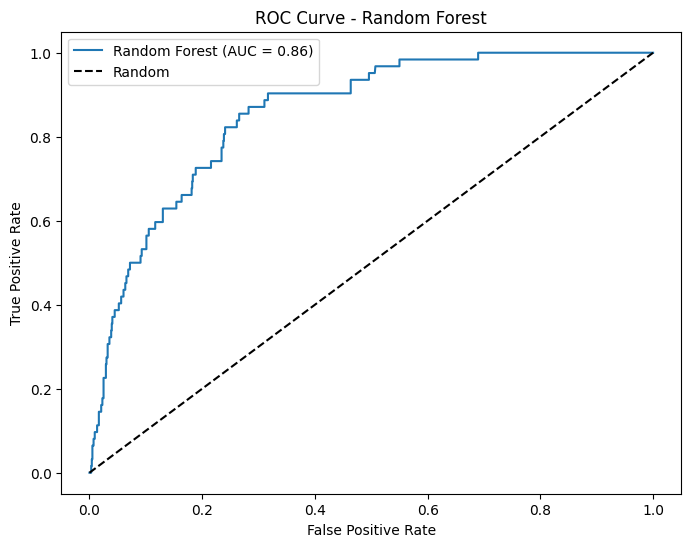

In [ ]:
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {label}')
    plt.legend()
    plt.show()

# Plot ROC Curve for Random Forest
plot_roc_curve(rf_model, X_test, y_test, 'Random Forest')

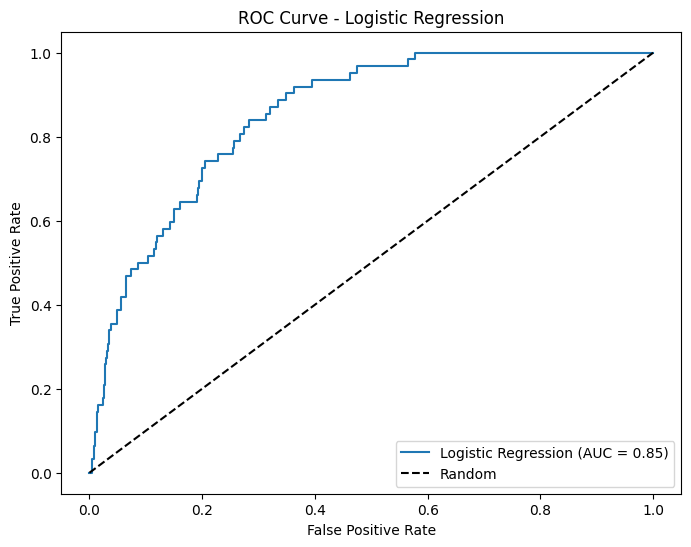

In [ ]:
plot_roc_curve(lr_model, X_test, y_test, 'Logistic Regression')